In [409]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict

sns.set()

In [410]:
# read csv containing programming languages
languages_df = pd.read_csv("authorship-verification-languages.csv").drop(columns=['Unnamed: 0'])
languages_df.head(9)

,name,language
0,araujo20,Python
1,boenninghoff20,Python
2,faber20,Python
3,gagala20,Python
4,halvani20,Python
5,kipnis20,Python
6,niven20,Python
7,ordonez20,Python
8,weerasinghe20,Python


In [411]:
# count programming languages and rename columns
languages_df = languages_df['language'].value_counts().to_frame().reset_index().rename(columns={'index': 'language', 'language': 'count'})[:10]
languages_df.head(10)

,language,count
0,Python,9


In [412]:
# show distribution of used programming languages
# plt.figure(figsize=(20,10))
# ax = sns.barplot(data=languages_df, x='language', y='count', orient='v')
# ax.set_title('Language distribution')
# ax.set_xlabel('Language')
# ax.set_ylabel('Number of submitted solutions')
# plt.show()

In [413]:
# read csv containing imports
imports_df = pd.read_csv('authorship-verification-imports.csv').drop(columns=["Unnamed: 0"])
imports_df.head(9)

,name,imports
0,araujo20,"argparse, ujson, os, glob, shutil, numpy, skle..."
1,boenninghoff20,"warnings, tensorflow, numpy, textacy.preproces..."
2,faber20,"os, pickle, argparse, json, tqdm, numpy, tenso..."
3,gagala20,"os, jsonlines, math, re, json, pathos.pools, p..."
4,halvani20,"os, re, shutil, disutils.core, numpy, spacy, s..."
5,kipnis20,"__future__, os, json, argparse, joblib, sys, n..."
6,niven20,"argparse, os, importlib, tqdm.notebook, torch...."
7,ordonez20,"os, sys, torch, torch.nn, pytorch_lightning, a..."
8,weerasinghe20,"numpy, re, string, os.path, sklearn.feature_ex..."


In [414]:
# convert string into a list
def convert(s):
    return list(s.split(", "))

In [415]:
# convert string and determine count of imports per solution
imports_df['imports'] = imports_df['imports'].apply(convert)  # pandas messes with lists when converting to/from CSV
imports_df['num_imports'] = imports_df['imports'].apply(len)
imports_df.head(9)

,name,imports,num_imports
0,araujo20,"[argparse, ujson, os, glob, shutil, numpy, skl...",13
1,boenninghoff20,"[warnings, tensorflow, numpy, textacy.preproce...",9
2,faber20,"[os, pickle, argparse, json, tqdm, numpy, tens...",23
3,gagala20,"[os, jsonlines, math, re, json, pathos.pools, ...",10
4,halvani20,"[os, re, shutil, disutils.core, numpy, spacy, ...",40
5,kipnis20,"[__future__, os, json, argparse, joblib, sys, ...",25
6,niven20,"[argparse, os, importlib, tqdm.notebook, torch...",43
7,ordonez20,"[os, sys, torch, torch.nn, pytorch_lightning, ...",55
8,weerasinghe20,"[numpy, re, string, os.path, sklearn.feature_e...",22


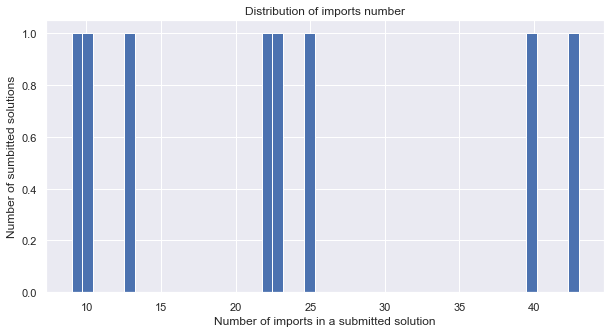

In [416]:
# show distribution of the count of used imports per solution
plt.figure(figsize=(10,5))
plt.hist(imports_df[imports_df['num_imports'] != 0][imports_df['num_imports'] < 50]['num_imports'],
         bins=48, density=False, log=False)
plt.title('Distribution of imports number')
plt.xlabel('Number of imports in a submitted solution')
plt.ylabel('Number of sumbitted solutions')
plt.show()

In [417]:
# determine and count unique imports (built-ins included)
imports_count = defaultdict(int)
for imports in imports_df['imports']:
    imports = set(lib.split('.')[0] for lib in imports)
    for lib in imports:
        imports_count[lib] = imports_count.get(lib, 0) + 1

In [418]:
# sort unique imports (built-ins included)
sorted_imports_count = sorted(imports_count.items(), key=lambda itm: itm[1], reverse=True)
frequent_imports = list(x[0] for x in sorted_imports_count)
print(f'Got {len(sorted_imports_count)} unique libraries')

Got 77 unique libraries


In [419]:
# create dataframe for sorted imports (built-ins included)
sorted_imports_count = pd.DataFrame(sorted_imports_count, columns=['library', 'count'])

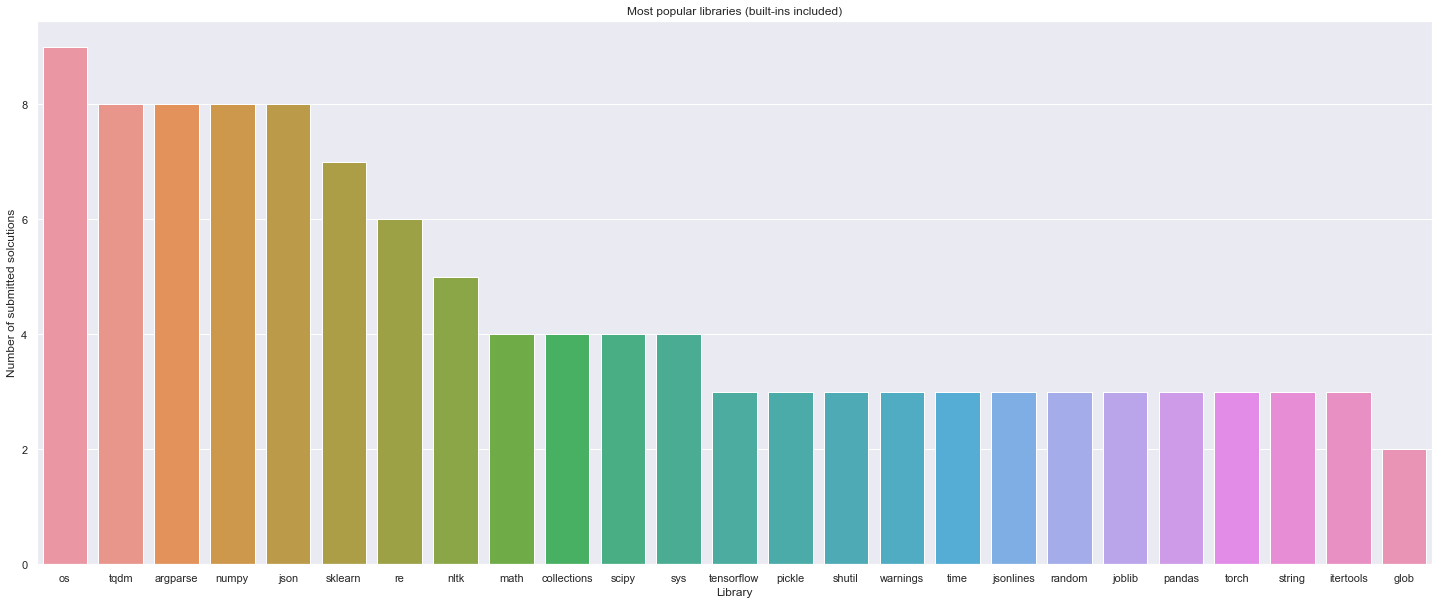

In [420]:
# show distribution of imports per solution (built-ins included)
plt.figure(figsize=(25,10))
ax = sns.barplot(data=sorted_imports_count[:25], x='library', y='count', orient='v')
ax.set_title('Most popular libraries (built-ins included)')
ax.set_xlabel('Library')
ax.set_ylabel('Number of submitted solcutions')
plt.show()

In [421]:
# list of built-in imports
builtin_imports = list(set(['__future__', '__main__', '_dummy_thread', '_thread', 'abc', 'aifc', 'argparse', 'array', 'ast', 'asynchat', 'asyncio', 'asyncore', 'atexit', 'audioop', 'base64', 'bdb', 'binascii', 'binhex', 'bisect', 'builtins', 'bz2', 'cProfile', 'calendar', 'cgi', 'cgitb', 'chunk', 'cmath', 'cmd', 'code', 'codecs', 'codeop', 'collections', 'collections.abc', 'colorsys', 'compileall', 'concurrent.futures', 'configparser', 'contextlib', 'copy', 'copyreg', 'crypt', 'csv', 'ctypes', 'curses', 'curses.ascii', 'curses.panel', 'curses.textpad', 'datetime', 'dbm', 'dbm.dumb', 'dbm.gnu', 'dbm.ndbm', 'decimal', 'difflib', 'dis', 'distutils', 'distutils.archive_util', 'distutils.bcppcompiler', 'distutils.ccompiler', 'distutils.cmd', 'distutils.command', 'distutils.command.bdist', 'distutils.command.bdist_dumb', 'distutils.command.bdist_msi', 'distutils.command.bdist_packager', 'distutils.command.bdist_rpm', 'distutils.command.bdist_wininst', 'distutils.command.build', 'distutils.command.build_clib', 'distutils.command.build_ext', 'distutils.command.build_py', 'distutils.command.build_scripts', 'distutils.command.check', 'distutils.command.clean', 'distutils.command.config', 'distutils.command.install', 'distutils.command.install_data', 'distutils.command.install_headers', 'distutils.command.install_lib', 'distutils.command.install_scripts', 'distutils.command.register', 'distutils.command.sdist', 'distutils.core', 'distutils.cygwinccompiler', 'distutils.debug', 'distutils.dep_util', 'distutils.dir_util', 'distutils.dist', 'distutils.errors', 'distutils.extension', 'distutils.fancy_getopt', 'distutils.file_util', 'distutils.filelist', 'distutils.log', 'distutils.msvccompiler', 'distutils.spawn', 'distutils.sysconfig', 'distutils.text_file', 'distutils.unixccompiler', 'distutils.util', 'distutils.version', 'doctest', 'dummy_threading', 'email', 'email.charset', 'email.contentmanager', 'email.encoders', 'email.errors', 'email.generator', 'email.header', 'email.headerregistry', 'email.iterators', 'email.message', 'email.mime', 'email.parser', 'email.policy', 'email.utils', 'encodings.idna', 'encodings.mbcs', 'encodings.utf_8_sig', 'ensurepip', 'enum', 'errno', 'faulthandler', 'fcntl', 'filecmp', 'fileinput', 'fnmatch', 'formatter', 'fpectl', 'fractions', 'ftplib', 'functools', 'gc', 'getopt', 'getpass', 'gettext', 'glob', 'grp', 'gzip', 'hashlib', 'heapq', 'hmac', 'html', 'html.entities', 'html.parser', 'http', 'http.client', 'http.cookiejar', 'http.cookies', 'http.server', 'imaplib', 'imghdr', 'imp', 'importlib', 'importlib.abc', 'importlib.machinery', 'importlib.util', 'inspect', 'io', 'ipaddress', 'itertools', 'json', 'json.tool', 'keyword', 'lib2to3', 'linecache', 'locale', 'logging', 'logging.config', 'logging.handlers', 'lzma', 'macpath', 'mailbox', 'mailcap', 'marshal', 'math', 'mimetypes', 'mmap', 'modulefinder', 'msilib', 'msvcrt', 'multiprocessing', 'multiprocessing.connection', 'multiprocessing.dummy', 'multiprocessing.managers', 'multiprocessing.pool', 'multiprocessing.sharedctypes', 'netrc', 'nis', 'nntplib', 'numbers', 'operator', 'optparse', 'os', 'os.path', 'ossaudiodev', 'parser', 'pathlib', 'pdb', 'pickle', 'pickletools', 'pipes', 'pkgutil', 'platform', 'plistlib', 'poplib', 'posix', 'pprint', 'profile', 'pstats', 'pty', 'pwd', 'py_compile', 'pyclbr', 'pydoc', 'queue', 'quopri', 'random', 're', 'readline', 'reprlib', 'resource', 'rlcompleter', 'runpy', 'sched', 'select', 'selectors', 'shelve', 'shlex', 'shutil', 'signal', 'site', 'smtpd', 'smtplib', 'sndhdr', 'socket', 'socketserver', 'spwd', 'sqlite3', 'ssl', 'stat', 'statistics', 'string', 'stringprep', 'struct', 'subprocess', 'sunau', 'symbol', 'symtable', 'sys', 'sysconfig', 'syslog', 'tabnanny', 'tarfile', 'telnetlib', 'tempfile', 'termios', 'test', 'test.support', 'textwrap', 'threading', 'time', 'timeit', 'tkinter', 'tkinter.scrolledtext', 'tkinter.tix', 'tkinter.ttk', 'token', 'tokenize', 'trace', 'traceback', 'tracemalloc', 'tty', 'turtle', 'turtledemo', 'types', 'typing', 'unicodedata', 'unittest', 'unittest.mock', 'urllib', 'urllib.error', 'urllib.parse', 'urllib.request', 'urllib.response', 'urllib.robotparser', 'uu', 'uuid', 'venv', 'warnings', 'wave', 'weakref', 'webbrowser', 'winreg', 'winsound', 'wsgiref', 'wsgiref.handlers', 'wsgiref.headers', 'wsgiref.simple_server', 'wsgiref.util', 'wsgiref.validate', 'xdrlib', 'xml', 'xml.dom', 'xml.dom.minidom', 'xml.dom.pulldom', 'xml.etree.ElementTree', 'xml.parsers.expat', 'xml.parsers.expat.errors', 'xml.parsers.expat.model', 'xml.sax', 'xml.sax.handler', 'xml.sax.saxutils', 'xml.sax.xmlreader', 'xmlrpc.client', 'xmlrpc.server', 'zipapp', 'zipfile', 'zipimport', 'zlib']))

In [422]:
# determine and count unique imports (built-ins excluded)
imports_without_builtins = defaultdict(int)
for imports in imports_df['imports']:
    imports = set(lib.split('.')[0] for lib in imports if lib.split('.')[0] not in builtin_imports)
    for lib in imports:
        imports_without_builtins[lib] = imports_count.get(lib, 0) + 1

In [423]:
# sort unique imports (built-ins excluded)
sorted_imports_without_builtins = sorted(imports_without_builtins.items(), key=lambda itm: itm[1], reverse=True)
print(f'Got {len(sorted_imports_without_builtins)} unique libraries')

# create dataframe for sorted imports (built-ins excluded)
sorted_imports_without_builtins = pd.DataFrame(sorted_imports_without_builtins, columns=['library', 'count'])

Got 38 unique libraries


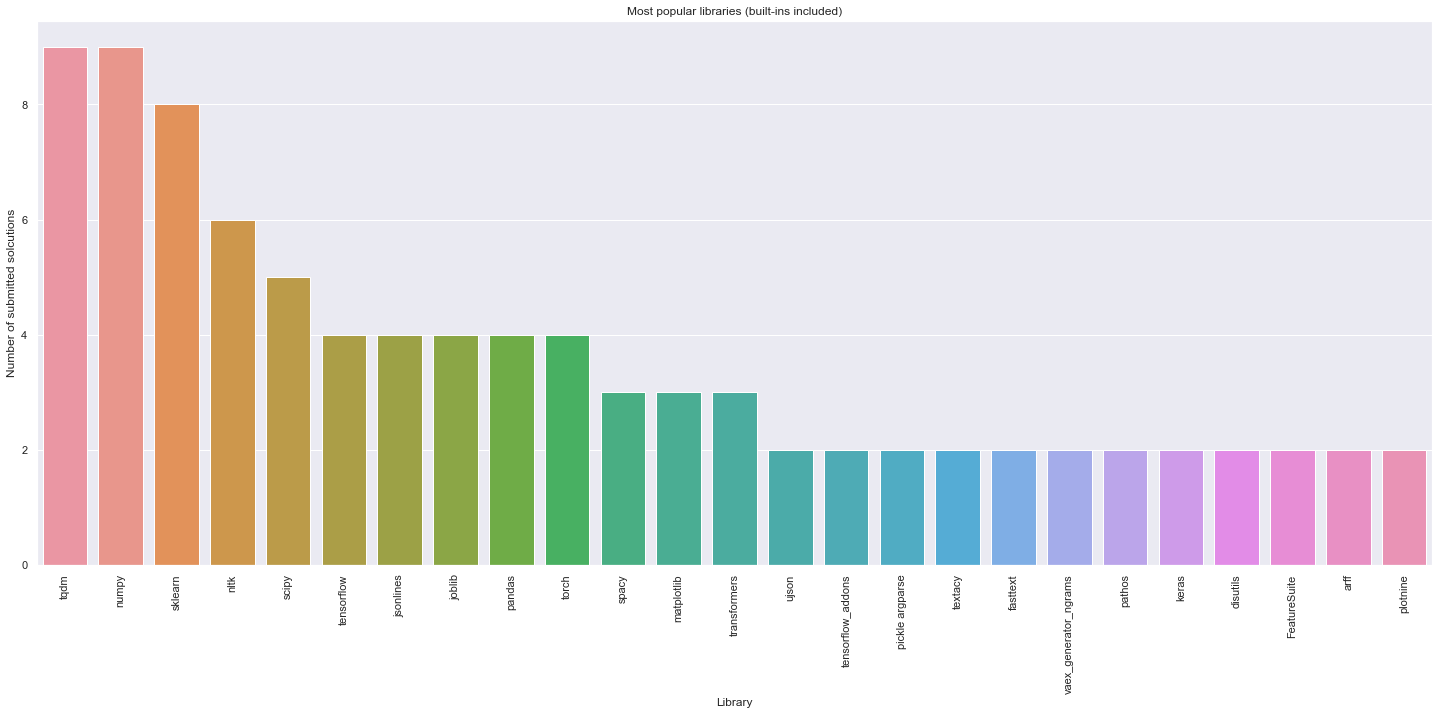

In [424]:
# show distribution of imports per solution (built-ins excluded)
plt.figure(figsize=(25,10))
ax = sns.barplot(data=sorted_imports_without_builtins[:25], x='library', y='count', orient='v')
ax.set_title('Most popular libraries (built-ins included)')
ax.set_xlabel('Library')
ax.set_ylabel('Number of submitted solcutions')
plt.xticks(rotation=90)
plt.show()

In [425]:
# list of deep learning/ machine learning libraries
ai_imports = ['torch', 'keras', 'tensorflow']

# number of submitted solutions
count_solutions = len(imports_df['imports'])

# determine and count deep learning/ machine learning libraries 
ia_libraries = defaultdict(int)
for imports in imports_df['imports']:
    imports = set(lib.split('.')[0] for lib in imports if lib.split('.')[0] in ai_imports)
    for lib in imports:
        ia_libraries[lib] = imports_count.get(lib, 0) + 1

In [426]:
# sort deep learning/ machine learning libraries 
sorted_ai_libraries = sorted(ia_libraries.items(), key=lambda itm: itm[1], reverse=True)

# sort deep learning/ machine learning libraries 
sorted_ai_libraries = pd.DataFrame(sorted_ai_libraries, columns=['library', 'count'])
sorted_ai_libraries.head()

,library,count
0,tensorflow,4
1,torch,4
2,keras,2
